<a href="https://colab.research.google.com/github/prad69/NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
#Read the dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/datasets/NLP/Tweets.csv")
df.head(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape

(14640, 15)

In [5]:
#Using the tweets to predict the sentiment
#Only using a subset of the data (5000 samples randomly picked)

indexes = list(range(df.shape[0]))
#Taking 5000 samples at random
l = np.random.choice(indexes,5000)

X = df.loc[l,'text']  #Tweets

Y = df.loc[l,'airline_sentiment'] #The Actual (Target) Sentiments

In [6]:
#Let's generate the BoW representation for the tweets
from nltk import word_tokenize
nltk.download('punkt_tab')
tokenized_tweets = []
for each in X.str.lower():
    tokenized_tweets.append(nltk.word_tokenize(each))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
tokenized_tweets[:2] #First two tokenized tweets

[['@',
  'americanair',
  'i',
  'need',
  'a',
  'flight',
  'out',
  'tonight',
  '.',
  'is',
  "n't",
  'there',
  'anything',
  'else',
  '?'],
 ['@',
  'usairways',
  'i',
  'listed',
  'my',
  'baggage',
  'claim',
  'number',
  '.',
  'have',
  'them',
  'call',
  'me',
  ',',
  'my',
  'number',
  'is',
  'on',
  'the',
  'ticket',
  '.',
  'i',
  'had',
  'to',
  'use',
  'lady',
  'speed',
  'stick',
  'this',
  'morning',
  '.']]

In [8]:
#Next, we will remove the stopwords
nltk.download('stopwords')
#Let's fetch the English language stopwords
from nltk.corpus import stopwords
sw_list = stopwords.words('english')
print(sw_list)

sw_list.extend(['@',"'",'.','"','/','!',',',"'ve","...","n't",'$',"'s",'''"''',"''",'..','&','*',';','”','``',':','#','!','-','?','%',"'d","'m",'+','++'])
#print(sw_list)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
tweets_after_removing_SW = []
for each in tokenized_tweets:
    #print(each)
    line = []
    for word in each:
        if word not in sw_list:
            line.append(word)
    tweets_after_removing_SW.append(line)

tweets_after_removing_SW[:2] #First 2 tweets after removal of Stopwords
#print(tweets_after_removing_SW)

[['americanair', 'need', 'flight', 'tonight', 'anything', 'else'],
 ['usairways',
  'listed',
  'baggage',
  'claim',
  'number',
  'call',
  'number',
  'ticket',
  'use',
  'lady',
  'speed',
  'stick',
  'morning']]

In [10]:
#Let's do stemming to reduce the number of features!
from nltk.stem import SnowballStemmer
s_stemmer = SnowballStemmer('english')

s_stemmed_list = [] #After Stemming

for each_list in tweets_after_removing_SW:
    line = []
    for word in each_list:
        line.append(s_stemmer.stem(word))
    s_stemmed_list.append(line)
s_stemmed_list[:2]

[['americanair', 'need', 'flight', 'tonight', 'anyth', 'els'],
 ['usairway',
  'list',
  'baggag',
  'claim',
  'number',
  'call',
  'number',
  'ticket',
  'use',
  'ladi',
  'speed',
  'stick',
  'morn']]

# Using BoW representation

In [11]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
inp = pd.DataFrame(te.fit(s_stemmed_list).transform(s_stemmed_list).astype(int), columns = te.columns_)
inp.head()

,(,),+1,+more,--,-.-,-/,-17mph,-1st,-beg,...,😩,😩😭,😩😭💔,😬,😭,😳,🙌🙌,🙏,🙏🙏🙏✌️✌️✌️🙏🙏🙏,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
inp.shape

(5000, 6528)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inp, Y, test_size = 0.3, random_state = 2)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [15]:
y_hat = model.predict(x_test) #Predictions
y_hat

array(['positive', 'negative', 'negative', ..., 'positive', 'negative',
       'negative'], dtype='<U8')

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.618

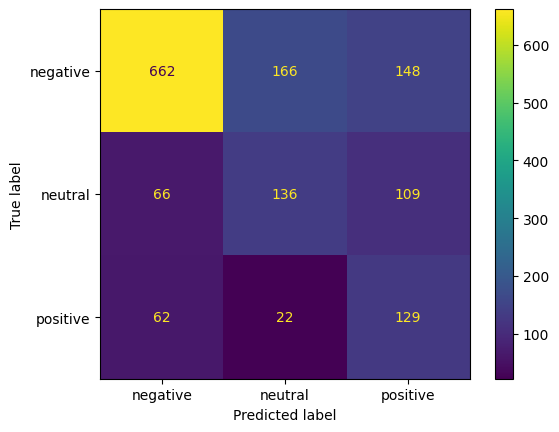

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using Term Frequency Matrix

In [18]:
# Convert List of lists to list of Strings
# using map() + join()

str_data = list(map(' '.join, s_stemmed_list))

str_data[:5] # Displaying the top 5 stemmed strings

['americanair need flight tonight anyth els',
 'usairway list baggag claim number call number ticket use ladi speed stick morn',
 'unit system failur = bad trend softwar project like fli airplan thing emerg takeoff',
 'unit staralli b gate far though',
 'jetblu flight 9:51pm alreadi delay']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(str_data)
str_df = pd.DataFrame(cv.transform(str_data).todense(), columns = sorted(cv.vocabulary_))
str_df.head()

,00,000,000ft,0011,00a,00p,01,02,03,04,...,zhxok07aqa,zipper,zkatcher,zl4bvexmcj,zoom,zrh,zrh_airport,zsdgzydnd,zurich,zv2pt6trk9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x_train, x_test, y_train, y_test = train_test_split(str_df, Y, test_size = 0.3, random_state = 2)

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.6

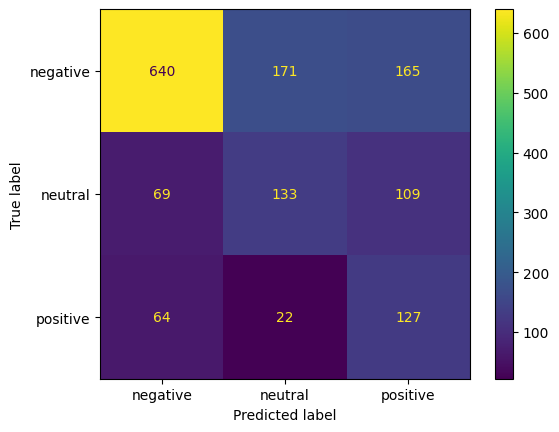

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
fidf = TfidfVectorizer()
fidf.fit(str_data)
tfidf_df = pd.DataFrame(fidf.transform(str_data).todense(), columns = sorted(fidf.vocabulary_))
tfidf_df.head()

,00,000,000ft,0011,00a,00p,01,02,03,04,...,zhxok07aqa,zipper,zkatcher,zl4bvexmcj,zoom,zrh,zrh_airport,zsdgzydnd,zurich,zv2pt6trk9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_df, Y, test_size = 0.3, random_state = 2)

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.5993333333333334

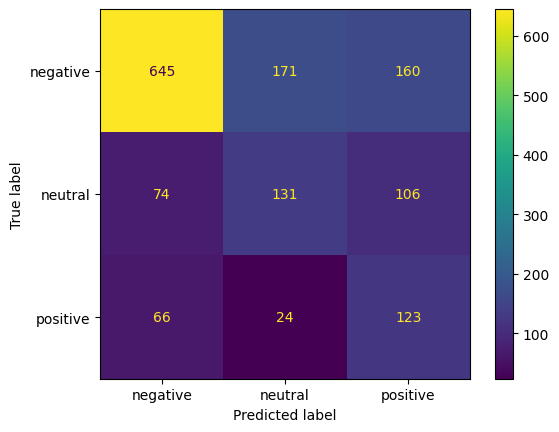

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

> To improve these results, you can think of reducing the dimensions of the input data by using appropriate dimensionality reduction techniques (feature selection & feature extraction).

> You can explore Ensemble-based classification models for better baseline results.

> Explore pre-trained models that have been built specifically for sentiment classification.

> Use sentence level embeddings from pretrained models for this supervised task.  

# Using Sentence Embeddings
## Training Doc2Vec

In [30]:
!pip install gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# The input should be passed in sentences (list of strings)
sentences = str_data[:3000] # Using the first 3000 samples to train the model

# Tag the sentences for training
tagged_data = [TaggedDocument(words=sentence.split(), tags=[str(i)]) for i, sentence in enumerate(sentences)]

# Train the model
doc2vec_model = Doc2Vec(tagged_data, vector_size=5, window=2, min_count=3, workers=4, epochs = 500)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 8.4 MB/s eta 0:00:00


In [36]:
# Get the embeddings for the sentences
sentences = str_data
sentence_vectors = [doc2vec_model.infer_vector(sentence.split()) for sentence in sentences]

# The infer_vectors expects the input as a list of words (nltk.word_tokenize())

print("Sentence Embeddings:")
print(np.array(sentence_vectors).shape) #Embeddings of the sentences

NameError: name 'doc2vec_model' is not defined

In [33]:
x_train = np.array(sentence_vectors)[:3000,:]
y_train = Y[:3000]

x_test =  np.array(sentence_vectors)[3000:,:]
y_test =  Y[3000:]

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.657

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using Pre-trained BERT for Sentiment Classification
Load the corresponding model as per the task chosen, and here we load distilled BERT base model for sentiment classification

In [37]:
from transformers import pipeline
model_trained = "distilbert-base-uncased-finetuned-sst-2-english"
distil_bert_model = pipeline(task="sentiment-analysis", model=model_trained)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [38]:
#Predictions
distil_bert_model(list(df.loc[11:15,'text'])) #Predicts one of two sentiments only: positive or negative

[{'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134}]

In [39]:
for each in df.loc[11:15,'text']:
    print(each)

@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p
@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn
@VirginAmerica Thanks!
@VirginAmerica SFO-PDX schedule is still MIA.


In [40]:
df.loc[11:15,'airline_sentiment']

,airline_sentiment
11,positive
12,positive
13,positive
14,positive
15,negative


# Using Pre-Trained Sentence-BERT Embeddings

---


SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings. The initial work is described in the paper Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks.

You can use this framework to compute sentence / text embeddings for more than 100 languages. These embeddings can then be compared e.g. with cosine-similarity to find sentences with a similar meaning. This can be useful for semantic textual similar, semantic search, or paraphrase mining.

The framework is based on PyTorch and Transformers and offers a large collection of pre-trained models tuned for various tasks. You can also fine-tune your own models.

Refer for more details here: https://www.sbert.net/

In [41]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

indexes = list(range(df.shape[0]))
# Choosing 5000 indexes at random
l = np.random.choice(indexes,5000)

#Our sentences we like to encode
sentences = list(df.loc[l,'text'].values) #Randomly choosing 5000 sentences

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
#for sentence, embedding in zip(sentences, embeddings):
#    print("Sentence:", sentence)
#    print("Embedding:", embedding)
#    print("")

np.array(embeddings).shape

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [43]:
target = df.loc[l,'airline_sentiment']

x_train = np.array(embeddings)[:3000,:]
y_train = target[:3000]

x_test =  np.array(embeddings)[3000:,:]
y_test =  target[3000:]

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.7395

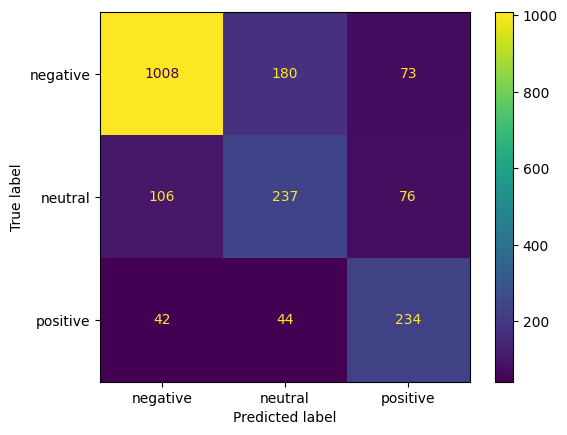

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using NLTK VADER

In [48]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Instantiate the SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

str_data = list(map(' '.join, tweets_after_removing_SW))

for each in str_data[:4]:
    print('-----------------------------------------')
    print("Text:", each)
    print(vader.polarity_scores(each))

    #Predictions on the basis of compound score
    print("Using compound score: ",end = '')
    if (vader.polarity_scores(each)['compound']) >= 0.05: #A positive word will have a score greater than 0.
        print('Overall Postive')
    elif (vader.polarity_scores(each)['compound']) <= -0.05: #A negative word will have a score less than 0.
        print('Overall Negative')
    else:
        print('Overall Neutral')


    #Find the sentiment with the max probability
    print("Using maximum probability score: ", end = '')
    neg_prob  = vader.polarity_scores(each)["neg"]
    pos_prob = vader.polarity_scores(each)["pos"]
    neu_prob  = vader.polarity_scores(each)["neu"]

    ind = [neg_prob, pos_prob, neu_prob].index(max([neg_prob, pos_prob, neu_prob]))

    if(ind==0):
        print("Negative")
    elif(ind==1):
        print("Positive")
    else:
        print('neutral')

print('-----------------------------------------\n')

-----------------------------------------
Text: americanair need flight tonight anything else
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Using compound score: Overall Neutral
Using maximum probability score: neutral
-----------------------------------------
Text: usairways listed baggage claim number call number ticket use lady speed stick morning
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.1531}
Using compound score: Overall Postive
Using maximum probability score: neutral
-----------------------------------------
Text: united system failure = bad trend software projects like flying airplane thing emergency takeoff
{'neg': 0.414, 'neu': 0.352, 'pos': 0.233, 'compound': -0.6249}
Using compound score: Overall Negative
Using maximum probability score: Negative
-----------------------------------------
Text: united staralliance b gates far though
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}
Using compound score: Overall Postive
Using maximum probabili

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
